# **0. UNION DE LOS DATASET**

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4400.32
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

In [ ]:
!unzip -qq DATASET_PROV.zip

In [ ]:
import pandas as pd
import glob
import os

# Ruta donde se encuentran todos los archivos CSV
ruta_archivos = '/content/DATASET_PROV/'  # Actualiza esto con la ruta correcta, asegúrate de incluir '/' al final

# Buscar todos los archivos CSV en la carpeta, usando os.path.join para construir la ruta
archivos_csv = glob.glob(os.path.join(ruta_archivos, 'flights_data*.csv'))

# Imprimir la lista de archivos encontrados para verificar
print(f"Archivos encontrados: {archivos_csv}")

# Leer y concatenar todos los archivos CSV
df_combinado = pd.concat([pd.read_csv(archivo) for archivo in archivos_csv], ignore_index=True)

# Guardar el archivo combinado en un nuevo CSV
df_combinado.to_csv('flights_data_prov.csv', index=False)

print("Los datasets han sido combinados exitosamente.")

Archivos encontrados: ['/content/DATASET_PROV/flights_data9.csv', '/content/DATASET_PROV/flights_data12.csv', '/content/DATASET_PROV/flights_data8.csv', '/content/DATASET_PROV/flights_data6.csv', '/content/DATASET_PROV/flights_data4.csv', '/content/DATASET_PROV/flights_data1.csv', '/content/DATASET_PROV/flights_data.csv', '/content/DATASET_PROV/flights_data13.csv', '/content/DATASET_PROV/flights_data11.csv', '/content/DATASET_PROV/flights_data7.csv', '/content/DATASET_PROV/flights_data14.csv', '/content/DATASET_PROV/flights_data10.csv', '/content/DATASET_PROV/flights_data2.csv', '/content/DATASET_PROV/flights_data3.csv', '/content/DATASET_PROV/flights_data5.csv']
Los datasets han sido combinados exitosamente.


# **1. ANALISIS DE LAS VARIABLES**

## IMPORTACION DE LIBRERIAS NECESARIAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

## OBTENCIÓN DEL DATASET

In [ ]:
# Ruta correcta del archivo después de subirlo a Colab
dataset_path = 'flights_data_prov.csv'

# Cargar el dataset en un DataFrame de pandas
df = pd.read_csv(dataset_path)

# Mostrar las primeras filas para verificar
print(df.head())

  Origen Hora de Salida Hora de Llegada Destino  Duración Tarifa  \
0    AQP          17:15           18:40     LIM  1h 25min  46,15   
1    AQP           9:40           11:10     LIM  1h 30min  46,15   
2    AQP          10:30           12:00     LIM  1h 30min  46,15   
3    AQP          10:50           12:20     LIM  1h 30min  46,15   
4    AQP          11:55           13:25     LIM  1h 30min  46,15   

           Operado por Directo Fecha de Salida    Fecha de Consulta  
0  latam airlines perú      Sí      dom, 02/03  2024-10-29 18:01:24  
1  latam airlines perú      Sí      dom, 02/03  2024-10-29 18:01:24  
2  latam airlines perú      Sí      dom, 02/03  2024-10-29 18:01:24  
3  latam airlines perú      Sí      dom, 02/03  2024-10-29 18:01:24  
4  latam airlines perú      Sí      dom, 02/03  2024-10-29 18:01:24  


## DESCRIPCIÓN DE LOS DATOS

Estos datos permiten un análisis de las tarifas, duración de los vuelos, y horarios de operación entre las ciudades de Arequipa y Lima, así como identificar patrones en los vuelos ofrecidos.

**>Origen:** Código del aeropuerto de salida (en este caso, todos los vuelos salen de AQP, que representa Arequipa).

**>Hora de Salida:** Hora en la que está programado el despegue del vuelo.

**>Hora de Llegada:** Hora de llegada programada en el aeropuerto de destino.

**>Destino**: Código del aeropuerto de destino (en este caso, LIM, que representa Lima).

**>Duración:** Tiempo total estimado del vuelo.

**>Tarifa:** Precio del boleto en la moneda especificada.

**>Operado por:** Nombre de la aerolínea que opera el vuelo (en este caso, "Latam Airlines Perú").

**>Directo:** Indica si el vuelo es directo o si tiene escalas (en este caso, todos los vuelos son directos).

**>Fecha de Salida:** Fecha de partida del vuelo, en formato de día de la semana y fecha.

**>Fecha de Consulta:** Fecha y hora en que se realizó la consulta de los datos del vuelo.

In [ ]:
#Tipos de Datos
print(df.dtypes)

Origen               object
Hora de Salida       object
Hora de Llegada      object
Destino              object
Duración             object
Tarifa               object
Operado por          object
Directo              object
Fecha de Salida      object
Fecha de Consulta    object
dtype: object


In [ ]:
# Mostrar información básica del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83383 entries, 0 to 83382
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Origen             83382 non-null  object
 1   Hora de Salida     83382 non-null  object
 2   Hora de Llegada    83382 non-null  object
 3   Destino            83382 non-null  object
 4   Duración           83382 non-null  object
 5   Tarifa             83382 non-null  object
 6   Operado por        83382 non-null  object
 7   Directo            83382 non-null  object
 8   Fecha de Salida    83382 non-null  object
 9   Fecha de Consulta  83382 non-null  object
dtypes: object(10)
memory usage: 6.4+ MB


In [ ]:
print("Numero de columnas:", df.shape[1])
print("Numero de filas:", df.shape[0])

Numero de columnas: 10
Numero de filas: 83383


**Estadísticas descriptivas**

In [ ]:
# Estadísticas descriptivas para las tarifas y duración
print("Estadísticas descriptivas de tarifas y duración:")
print(df[['Tarifa', 'Duración']].describe())


Estadísticas descriptivas de tarifas y duración:
       Tarifa  Duración
count   83382     83382
unique    753       170
top     82,73  1h 30min
freq     5364      4563


count = 83382: Hay 83,382 registros de tarifas en el dataset, lo que indica que se tiene una buena cantidad de datos.

unique = 753: Existen 753 tarifas únicas, lo que sugiere que la aerolínea ofrece una variedad de precios.

top = 82,73: La tarifa más frecuente es 82,73, lo que indica que esta es la tarifa más común en los vuelos analizados.

freq = 5364: Esta tarifa de 82,73 aparece 5,364 veces en el conjunto de datos, lo que refuerza su predominancia.

**Distribución de horarios de salida**

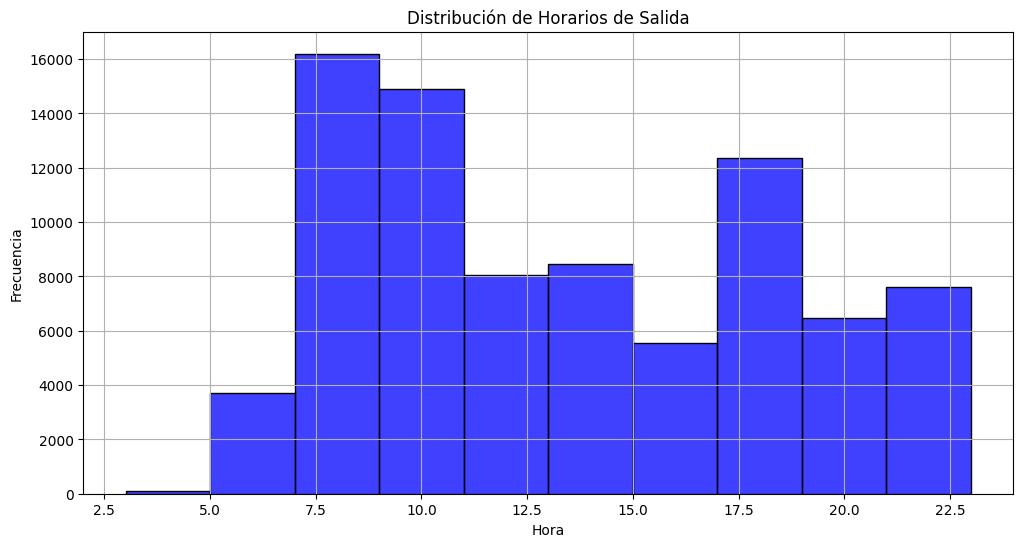

In [ ]:
# Convertir la columna 'Hora de Salida' a tipo datetime
df['Hora de Salida'] = pd.to_datetime(df['Hora de Salida'], format='%H:%M', errors='coerce')
# Visualización de horarios de salida
plt.figure(figsize=(12, 6))
sns.histplot(df['Hora de Salida'].dt.hour, bins=10, kde=False, color='blue')
plt.title('Distribución de Horarios de Salida')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


El histograma muestra que los vuelos se concentran en dos franjas horarias:

Mañana: Entre las 6:00 y 9:00 AM, con mayor actividad.

Tarde: Entre las 5:00 y 6:00 PM.
Estas horas son estratégicas, probablemente para facilitar la conexión de vuelos o atender la demanda en horarios laborales y de ocio.

**Proporción de vuelos directos**

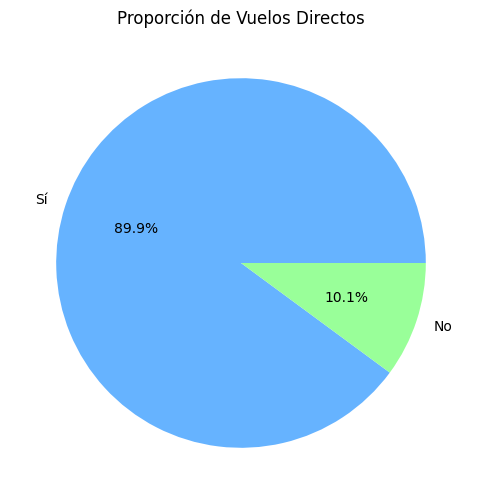

In [ ]:
# Proporción de vuelos directos
directos = df['Directo'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
directos.plot.pie(autopct='%1.1f%%', labels=['Sí', 'No'], colors=['#66b3ff', '#99ff99'])
plt.title('Proporción de Vuelos Directos')
plt.ylabel('')
plt.show()


El gráfico circular muestra que el 89.9% de los vuelos son directos.

Esto es conveniente para los pasajeros, ya que no tienen que preocuparse por escalas o cambios de avión.


**Análisis de la columna "Origen"**

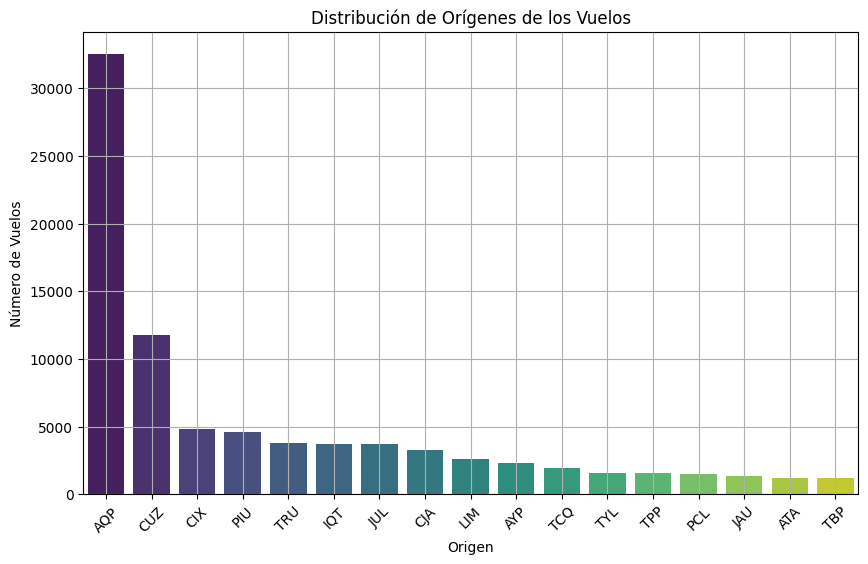

Origen
AQP    32514
CUZ    11753
CIX     4848
PIU     4601
TRU     3772
IQT     3726
JUL     3684
CJA     3254
LIM     2569
AYP     2316
TCQ     1937
TYL     1585
TPP     1570
PCL     1517
JAU     1312
ATA     1230
TBP     1194
Name: count, dtype: int64


In [ ]:
# Análisis de la columna 'Origen'
origen_count = df['Origen'].value_counts()

# Visualización de la distribución de los orígenes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Origen', order=origen_count.index, palette='viridis')
plt.title('Distribución de Orígenes de los Vuelos')
plt.xlabel('Origen')
plt.ylabel('Número de Vuelos')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Mostrar los primeros valores de la frecuencia
print(origen_count)


AQP (Arequipa) es el origen más frecuente con 32,514 vuelos, lo que sugiere que tiene una alta demanda de vuelos.

CUZ (Cusco), con 11,753 vuelos, también tiene una gran demanda, posiblemente por su atractivo turístico.

CIX (Chiclayo) y PIU (Piura) tienen cantidades moderadas de vuelos (4,848 y 4,601 respectivamente), lo que refleja una demanda considerable en el norte del Perú.

TRU (Trujillo) y IQT (Iquitos), con 3,772 y 3,726 vuelos, muestran una demanda significativa, impulsada por su relevancia comercial y turística.

JUL (Juliaca) y CJA (Cajamarca), con 3,684 y 3,254 vuelos, tienen una demanda moderada, especialmente por su importancia cultural y económica.

LIM (Lima), aunque la capital, muestra una cifra relativamente baja de 2,569 vuelos, ya que la mayoría de los vuelos desde otras ciudades tienen a Lima como destino.

Otras ciudades como AYP (Ayacucho), TCQ (Tarapoto), TYL (Talara), TPP (Tumbes), PCL (Pucallpa), JAU (Jaén) y ATA (Arequipa) muestran una menor cantidad de vuelos, reflejando una demanda más limitada, en su mayoría asociada a necesidades locales o de nicho.

**Análisis de la columna "Destino"**

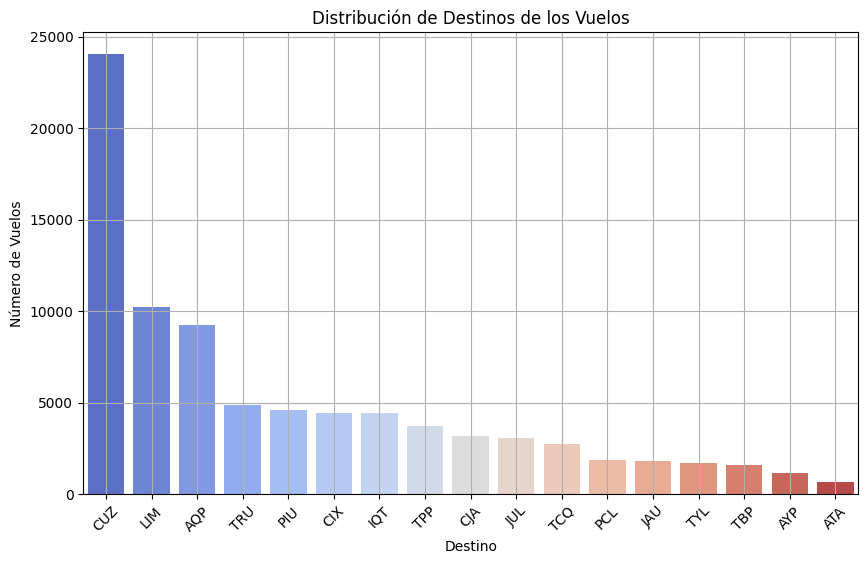

Destino
CUZ    24032
LIM    10242
AQP     9233
TRU     4853
PIU     4609
CIX     4449
IQT     4415
TPP     3724
CJA     3179
JUL     3075
TCQ     2727
PCL     1873
JAU     1825
TYL     1714
TBP     1602
AYP     1176
ATA      654
Name: count, dtype: int64


In [ ]:
# Análisis de la columna 'Destino'
destino_count = df['Destino'].value_counts()

# Visualización de la distribución de los destinos
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Destino', order=destino_count.index, palette='coolwarm')
plt.title('Distribución de Destinos de los Vuelos')
plt.xlabel('Destino')
plt.ylabel('Número de Vuelos')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Mostrar los primeros valores de la frecuencia
print(destino_count)


CUZ (Cusco) es el destino más frecuente con 24,032 vuelos, lo que refleja su importancia como uno de los destinos turísticos más populares del Perú, especialmente por su cercanía a Machu Picchu.

LIM (Lima), como capital y centro comercial y económico del país, es el segundo destino más frecuente con 10,242 vuelos, indicando que Lima es un hub central de conexiones nacionales.

AQP (Arequipa), con 9,233 vuelos, también es un destino importante, especialmente por su turismo y relevancia económica en el sur del país.

TRU (Trujillo) y PIU (Piura), con 4,853 y 4,609 vuelos, son destinos importantes en el norte del país, reflejando su crecimiento económico y atractivo turístico.

CIX (Chiclayo) y IQT (Iquitos), con 4,449 y 4,415 vuelos, son destinos de interés, impulsados por el turismo y la economía local, especialmente Iquitos por su cercanía a la Amazonía.

TPP (Tumbes), CJA (Cajamarca) y JUL (Juliaca), con 3,724, 3,179 y 3,075 vuelos, tienen una demanda moderada, asociada a sus características geográficas, comerciales o turísticas.

TCQ (Tarapoto) y PCL (Pucallpa), con 2,727 y 1,873 vuelos, muestran una demanda más limitada, probablemente debido a su menor visibilidad turística o desarrollo comercial.

JAU (Jaén), TYL (Talara) y TBP (Tumbes) tienen menos vuelos, con 1,825, 1,714 y 1,602 respectivamente, lo que refleja una demanda más específica o reducida.

AYP (Ayacucho) y ATA (Arequipa), con 1,176 y 654 vuelos, tienen una demanda bastante baja, lo que podría estar asociado a su menor perfil turístico o económico.

**Análisis de la columna "Directo"**

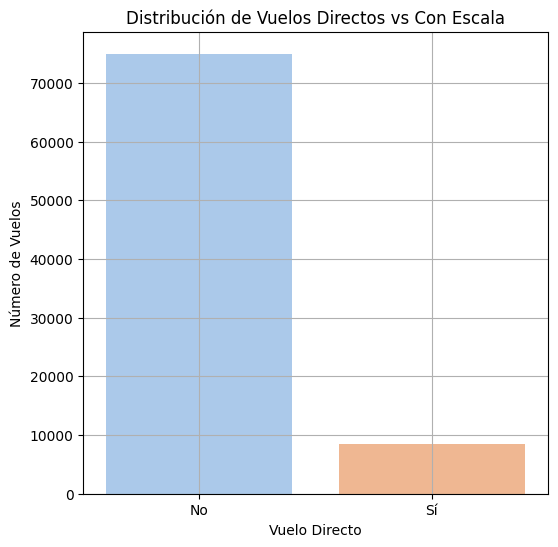

Directo
No    74955
Sí     8427
Name: count, dtype: int64


In [ ]:
# Análisis de la columna 'Directo'
directo_count = df['Directo'].value_counts()

# Visualización de la distribución de vuelos directos y con escala
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Directo', order=directo_count.index, palette='pastel')
plt.title('Distribución de Vuelos Directos vs Con Escala')
plt.xlabel('Vuelo Directo')
plt.ylabel('Número de Vuelos')
plt.xticks(rotation=0)
plt.grid()
plt.show()

# Mostrar los primeros valores de la frecuencia
print(directo_count)


No (74955 vuelos): La gran mayoría de los vuelos en el dataset no son directos, con 74,955 vuelos, lo que indica que la mayoría de los viajes entre las ciudades requieren escalas o conexiones en otros aeropuertos.

Sí (8427 vuelos): Solo 8,427 vuelos son directos, lo que representa una proporción más pequeña (alrededor del 10%) del total de vuelos.

# **2. PREPROCESAMIENTO DEL DATASET**

In [ ]:
df.duplicated().sum()  # Verifica filas duplicadas en el DataFrame 'df' y cuenta el total

1903

In [ ]:
# Elimina duplicados en todas las columnas y mantiene solo la primera aparición
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()  # Verifica filas duplicadas en el DataFrame 'df' y cuenta el total

0

In [ ]:
df.describe()  # Genera un resumen estadístico de las columnas numéricas en el DataFrame 'df'

,Origen,Hora de Salida,Hora de Llegada,Destino,Duración,Tarifa,Operado por,Directo,Fecha de Salida,Fecha de Consulta
count,81479,81479,81479,81479,81479,81479,81479,81479,81479,81479
unique,17,129,164,17,170,753,1,2,1,11059
top,AQP,9:40,20:50,CUZ,1h 30min,"82,73",latam airlines perú,No,"dom, 02/03",2024-11-05 18:07:29
freq,31036,4106,3822,24032,4563,5364,81479,73052,81479,24


In [ ]:
# Verificar la cantidad de valores nulos en cada columna del DataFrame
# df: Es el DataFrame que contiene los datos que estamos analizando

# .isnull() devuelve un DataFrame del mismo tamaño que df,
# donde cada elemento es True si el valor es nulo (NaN) y False si no lo es.
nulos = df.isnull()

# .sum() suma los valores True (1) en cada columna,
# proporcionando el conteo de valores nulos en cada columna del DataFrame.
conteo_nulos = nulos.sum()

# Mostrar el conteo de valores nulos en cada columna
print(conteo_nulos)

Origen               1
Hora de Salida       1
Hora de Llegada      1
Destino              1
Duración             1
Tarifa               1
Operado por          1
Directo              1
Fecha de Salida      1
Fecha de Consulta    1
dtype: int64


In [ ]:
#Eliminar las filas con valores nulos
df = df.dropna()

In [ ]:
#Verificar nuevamente los valores nulos
conteo_nulos = df.isnull().sum()
print(conteo_nulos)

Origen               0
Hora de Salida       0
Hora de Llegada      0
Destino              0
Duración             0
Tarifa               0
Operado por          0
Directo              0
Fecha de Salida      0
Fecha de Consulta    0
dtype: int64


In [ ]:
# Cuenta los duplicados en el DataFrame.
print("Nummero de datos duplicados: ", df.duplicated().sum())
# Verifica si hay filas duplicadas en el DataFrame.
# df.duplicated() devuelve una serie booleana que indica si una fila es duplicada (True) o no (False).
# any() aplicado a la serie devuelve True si hay al menos una fila duplicada.


df.duplicated().any()

Nummero de datos duplicados:  0


False



> Eliminar la columna Operado Por --> Toda la columna es igual (latam airlines perú )


In [ ]:
df = df.drop('Operado por', axis=1)

In [ ]:
print(df)

      Origen Hora de Salida         Hora de Llegada Destino   Duración Tarifa  \
0        AQP          17:15                   18:40     LIM   1h 25min  46,15   
1        AQP           9:40                   11:10     LIM   1h 30min  46,15   
2        AQP          10:30                   12:00     LIM   1h 30min  46,15   
3        AQP          10:50                   12:20     LIM   1h 30min  46,15   
4        AQP          11:55                   13:25     LIM   1h 30min  46,15   
...      ...            ...                     ...     ...        ...    ...   
83378    TPP          13:55                   15:10     LIM   1h 15min  50,89   
83379    TPP          19:00                   20:20     LIM   1h 20min  48,53   
83380    TPP          20:05                   21:25     LIM   1h 20min  48,53   
83381    TPP          20:05  6:35 del siguiente día     AYP  10h 30min  82,75   
83382    TPP          19:00  6:35 del siguiente día     AYP  11h 35min  82,75   

      Directo Fecha de Sali

Eliminar la columna Fecha de Salida --> Toda la columna es igual (dom, 02/03)


In [ ]:
df = df.drop('Fecha de Salida', axis=1)

In [ ]:
print(df)

      Origen Hora de Salida         Hora de Llegada Destino   Duración Tarifa  \
0        AQP          17:15                   18:40     LIM   1h 25min  46,15   
1        AQP           9:40                   11:10     LIM   1h 30min  46,15   
2        AQP          10:30                   12:00     LIM   1h 30min  46,15   
3        AQP          10:50                   12:20     LIM   1h 30min  46,15   
4        AQP          11:55                   13:25     LIM   1h 30min  46,15   
...      ...            ...                     ...     ...        ...    ...   
83378    TPP          13:55                   15:10     LIM   1h 15min  50,89   
83379    TPP          19:00                   20:20     LIM   1h 20min  48,53   
83380    TPP          20:05                   21:25     LIM   1h 20min  48,53   
83381    TPP          20:05  6:35 del siguiente día     AYP  10h 30min  82,75   
83382    TPP          19:00  6:35 del siguiente día     AYP  11h 35min  82,75   

      Directo    Fecha de C

Proporcionando el formato necesario a las columnas de **Hora de Salida** y **Hora de Llegada**

In [ ]:
# 1. Eliminar texto adicional "del siguiente día" en las columnas 'Hora de Salida' y 'Hora de Llegada'
df['Hora de Salida'] = df['Hora de Salida'].astype(str).str.replace(" del siguiente día", "")
df['Hora de Llegada'] = df['Hora de Llegada'].astype(str).str.replace(" del siguiente día", "")

# 2. Asegurarse de que ambas horas tengan formato 'HH:MM' (eliminando los segundos si existen)
df['Hora de Salida'] = df['Hora de Salida'].str[:5]  # Solo conservar la parte de HH:MM
df['Hora de Llegada'] = df['Hora de Llegada'].str[:5]  # Solo conservar la parte de HH:MM

# 3. Convertir 'Hora de Salida' y 'Hora de Llegada' a formato datetime (hora)
df['Hora de Salida'] = pd.to_datetime(df['Hora de Salida'], format='%H:%M').dt.time
df['Hora de Llegada'] = pd.to_datetime(df['Hora de Llegada'], format='%H:%M').dt.time

# Verificar los cambios
print(df[['Hora de Salida', 'Hora de Llegada']].head())


  Hora de Salida Hora de Llegada
0       17:15:00        18:40:00
1       09:40:00        11:10:00
2       10:30:00        12:00:00
3       10:50:00        12:20:00
4       11:55:00        13:25:00


**Transformación de la variable Duración**


La variable Duración está en formato texto (e.g., "1h 25min"). Vamos a convertirla a minutos.

In [ ]:
# Función para convertir duración en formato "xh y ymin" a minutos
def convertir_duracion(duracion):
    horas = 0
    minutos = 0
    if 'h' in duracion:
        horas = int(duracion.split('h')[0].strip())
    if 'min' in duracion:
        minutos = int(duracion.split('min')[0].split()[-1].strip())
    return horas * 60 + minutos

# Aplicar la función para convertir duración a minutos
df['Duracion_min'] = df['Duración'].apply(convertir_duracion)
df.head()

,Origen,Hora de Salida,Hora de Llegada,Destino,Duración,Tarifa,Directo,Fecha de Consulta,Duracion_min
0,AQP,17:15:00,18:40:00,LIM,1h 25min,"46,15",Sí,2024-10-29 18:01:24,85
1,AQP,09:40:00,11:10:00,LIM,1h 30min,"46,15",Sí,2024-10-29 18:01:24,90
2,AQP,10:30:00,12:00:00,LIM,1h 30min,"46,15",Sí,2024-10-29 18:01:24,90
3,AQP,10:50:00,12:20:00,LIM,1h 30min,"46,15",Sí,2024-10-29 18:01:24,90
4,AQP,11:55:00,13:25:00,LIM,1h 30min,"46,15",Sí,2024-10-29 18:01:24,90


**Transformación de la variable Tarifa**


Convertir el formato de Tarifa a decimal.

In [ ]:
# Convertir 'Tarifa' de formato texto a tipo numérico (eliminamos la coma)
df['Tarifa'] = df['Tarifa'].str.replace(",", ".", regex=False).astype(float)

In [ ]:
df.head()

,Origen,Hora de Salida,Hora de Llegada,Destino,Duración,Tarifa,Directo,Fecha de Consulta,Duracion_min
0,AQP,17:15:00,18:40:00,LIM,1h 25min,46.15,Sí,2024-10-29 18:01:24,85
1,AQP,09:40:00,11:10:00,LIM,1h 30min,46.15,Sí,2024-10-29 18:01:24,90
2,AQP,10:30:00,12:00:00,LIM,1h 30min,46.15,Sí,2024-10-29 18:01:24,90
3,AQP,10:50:00,12:20:00,LIM,1h 30min,46.15,Sí,2024-10-29 18:01:24,90
4,AQP,11:55:00,13:25:00,LIM,1h 30min,46.15,Sí,2024-10-29 18:01:24,90


Eliminar la columna Duración --> ya contamos con la columna Duracion_min que es la Duración expresada en minutos

In [ ]:
df = df.drop('Duración', axis=1)
df.head()

,Origen,Hora de Salida,Hora de Llegada,Destino,Tarifa,Directo,Fecha de Consulta,Duracion_min
0,AQP,17:15:00,18:40:00,LIM,46.15,Sí,2024-10-29 18:01:24,85
1,AQP,09:40:00,11:10:00,LIM,46.15,Sí,2024-10-29 18:01:24,90
2,AQP,10:30:00,12:00:00,LIM,46.15,Sí,2024-10-29 18:01:24,90
3,AQP,10:50:00,12:20:00,LIM,46.15,Sí,2024-10-29 18:01:24,90
4,AQP,11:55:00,13:25:00,LIM,46.15,Sí,2024-10-29 18:01:24,90


**Preprocesamiento de variables categóricas**


Utilizamos Label Encoding para las variables categóricas Origen, Destino y Directo.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instanciar el codificador
le = LabelEncoder()

# Aplicar Label Encoding a las columnas categóricas
df['Origen'] = le.fit_transform(df['Origen'])
df['Destino'] = le.fit_transform(df['Destino'])
df['Directo'] = le.fit_transform(df['Directo'])  # Convertir 'Sí' a 1 y 'No' a 0


In [ ]:
df.head()

,Origen,Hora de Salida,Hora de Llegada,Destino,Tarifa,Directo,Fecha de Consulta,Duracion_min
0,0,17:15:00,18:40:00,9,46.15,1,2024-10-29 18:01:24,85
1,0,09:40:00,11:10:00,9,46.15,1,2024-10-29 18:01:24,90
2,0,10:30:00,12:00:00,9,46.15,1,2024-10-29 18:01:24,90
3,0,10:50:00,12:20:00,9,46.15,1,2024-10-29 18:01:24,90
4,0,11:55:00,13:25:00,9,46.15,1,2024-10-29 18:01:24,90


**Preprocesamiento de variables temporales**


Transformar la Fecha de Consulta a formato de fecha y HH:MM:SS

In [ ]:
# Convertir 'Fecha de Consulta' a formato datetime
df['Fecha de Consulta'] = pd.to_datetime(df['Fecha de Consulta'])

# Separar 'Fecha de Consulta' en 'Fecha de Salida Consulta' y 'Hora de Salida Consulta'
df['Fecha de Salida Consulta'] = df['Fecha de Consulta'].dt.date  # Extraer solo la fecha
df['Hora de Salida Consulta'] = df['Fecha de Consulta'].dt.time  # Extraer solo la hora

# Eliminar la columna original 'Fecha de Consulta' si ya no es necesaria
df = df.drop(columns=['Fecha de Consulta'])

# Verificar los cambios
print(df[['Fecha de Salida Consulta', 'Hora de Salida Consulta']].head())


  Fecha de Salida Consulta Hora de Salida Consulta
0               2024-10-29                18:01:24
1               2024-10-29                18:01:24
2               2024-10-29                18:01:24
3               2024-10-29                18:01:24
4               2024-10-29                18:01:24


## **Análisis de Outliers en la Duración del Vuelo**

In [ ]:
# Verificar los primeros registros del DataFrame para asegurar que las conversiones y nuevas columnas sean correctas
print(df.head())
print("")
# Verificar el tipo de las columnas relevantes
print(df.dtypes)


   Origen Hora de Salida Hora de Llegada  Destino  Tarifa  Directo  \
0       0       17:15:00        18:40:00        9   46.15        1   
1       0       09:40:00        11:10:00        9   46.15        1   
2       0       10:30:00        12:00:00        9   46.15        1   
3       0       10:50:00        12:20:00        9   46.15        1   
4       0       11:55:00        13:25:00        9   46.15        1   

   Duracion_min Fecha de Salida Consulta Hora de Salida Consulta  
0            85               2024-10-29                18:01:24  
1            90               2024-10-29                18:01:24  
2            90               2024-10-29                18:01:24  
3            90               2024-10-29                18:01:24  
4            90               2024-10-29                18:01:24  

Origen                        int64
Hora de Salida               object
Hora de Llegada              object
Destino                       int64
Tarifa                      floa

count    81479.000000
mean       403.990550
std        198.586623
min         45.000000
25%        265.000000
50%        375.000000
75%        540.000000
max       1425.000000
Name: Duracion_min, dtype: float64


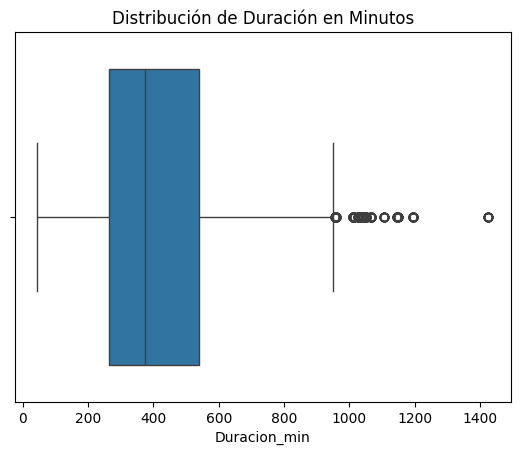

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Verificar el rango de duración para asegurar que no haya valores fuera del rango esperado
print(df['Duracion_min'].describe())
# Graficar un boxplot para Duración_min
sns.boxplot(x=df['Duracion_min'])
plt.title('Distribución de Duración en Minutos')
plt.show()

Del grafico observamos que:

Una caja que se extiende de 265 a 540 minutos.

Un valor de la mediana (línea dentro de la caja) cerca de 375 minutos.

Outliers significativos a la derecha, especialmente cerca de 1425 minutos, debido a los valores máximos muy altos.

count    81479.000000
mean       104.126592
std         53.027880
min         22.620000
25%         78.030000
50%         86.340000
75%        112.210000
max        594.850000
Name: Tarifa, dtype: float64


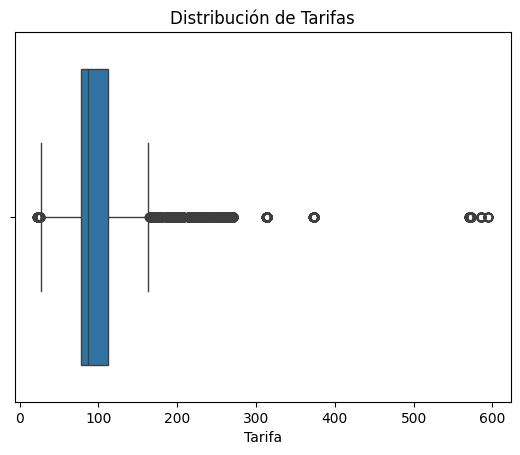

In [ ]:
# Verificar el rango de tarifa para asegurarse de que no haya valores fuera de lo esperado
print(df['Tarifa'].describe())

# Graficar un boxplot para Tarifa
sns.boxplot(x=df['Tarifa'])
plt.title('Distribución de Tarifas')
plt.show()


El gráfico de caja muestra una distribución de tarifas que es relativamente compacta en la parte inferior (la mayoría de los valores se concentran entre 78 y 112).

Habrá tarifas extremas a la derecha, que podrían ser representadas como valores atípicos (outliers) debido al valor máximo de 594.85.

El conjunto de datos parece estar sesgado hacia tarifas más bajas a moderadas, pero con algunas tarifas extremadamente altas que podrían influir en los valores promedio.

In [ ]:
# Calcular el IQR (rango intercuartílico) para 'Duracion_min' y 'Tarifa'
Q1 = df[['Duracion_min', 'Tarifa']].quantile(0.25)
Q3 = df[['Duracion_min', 'Tarifa']].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los outliers basados en el IQR
df_no_outliers = df[((df[['Duracion_min', 'Tarifa']] >= (Q1 - 1.5 * IQR)) &
                     (df[['Duracion_min', 'Tarifa']] <= (Q3 + 1.5 * IQR))).all(axis=1)]

# Verificar cómo quedó el dataset sin los outliers
print(df_no_outliers[['Duracion_min', 'Tarifa']].describe())


       Duracion_min        Tarifa
count  70757.000000  70757.000000
mean     394.641901     87.300641
std      194.384388     23.844738
min       45.000000     27.290000
25%      260.000000     76.830000
50%      365.000000     82.730000
75%      535.000000     98.090000
max      950.000000    162.990000


In [ ]:
# Calcular el IQR para 'Duracion_min' y 'Tarifa'
Q1_duracion = df['Duracion_min'].quantile(0.25)
Q3_duracion = df['Duracion_min'].quantile(0.75)
IQR_duracion = Q3_duracion - Q1_duracion
lower_bound_duracion = Q1_duracion - 1.5 * IQR_duracion
upper_bound_duracion = Q3_duracion + 1.5 * IQR_duracion

Q1_tarifa = df['Tarifa'].quantile(0.25)
Q3_tarifa = df['Tarifa'].quantile(0.75)
IQR_tarifa = Q3_tarifa - Q1_tarifa
lower_bound_tarifa = Q1_tarifa - 1.5 * IQR_tarifa
upper_bound_tarifa = Q3_tarifa + 1.5 * IQR_tarifa

# Filtrar los outliers
df_cleaned = df[(df['Duracion_min'] >= lower_bound_duracion) & (df['Duracion_min'] <= upper_bound_duracion)]
df_cleaned = df_cleaned[(df_cleaned['Tarifa'] >= lower_bound_tarifa) & (df_cleaned['Tarifa'] <= upper_bound_tarifa)]


In [ ]:
# Reemplazar outliers por el valor máximo o mínimo
df['Duracion_min'] = df['Duracion_min'].clip(lower=lower_bound_duracion, upper=upper_bound_duracion)
df['Tarifa'] = df['Tarifa'].clip(lower=lower_bound_tarifa, upper=upper_bound_tarifa)


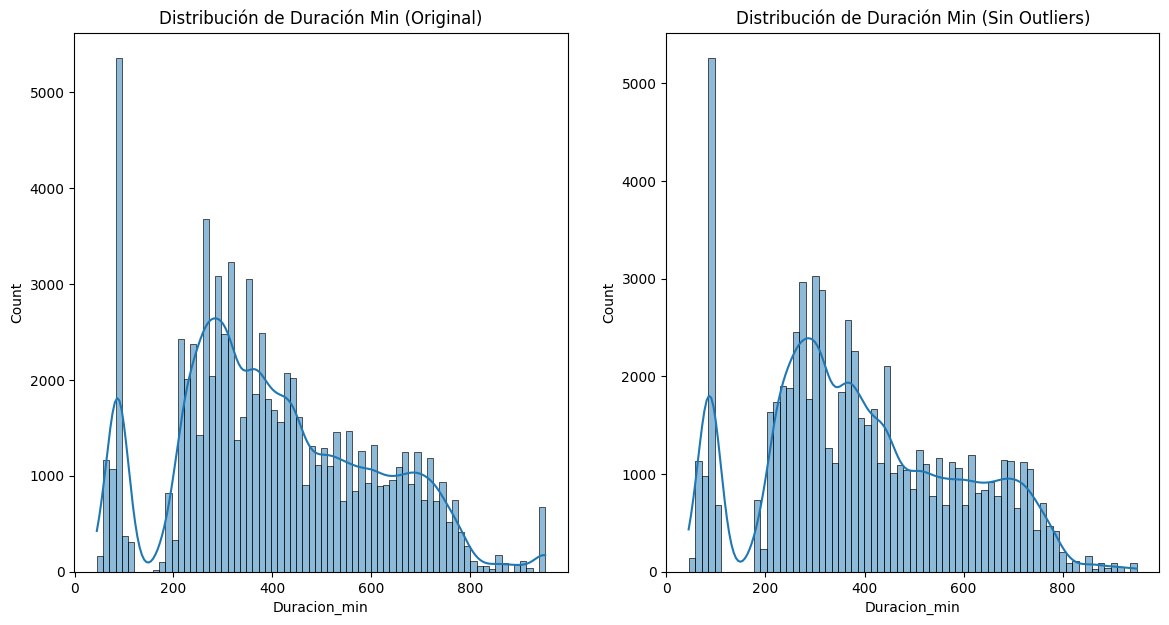

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma antes y después de eliminar outliers
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.histplot(df['Duracion_min'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Duración Min (Original)')

sns.histplot(df_cleaned['Duracion_min'], kde=True, ax=axes[1])
axes[1].set_title('Distribución de Duración Min (Sin Outliers)')

plt.show()


1. Con los outliers, el histograma original parece estar más sesgado y muestra una cola larga hacia la derecha, lo que indica que los valores atípicos están influyendo considerablemente en la distribución de las duraciones.

2. Sin los outliers, el histograma después de la limpieza ofrece una visualización más representativa de la distribución real de las duraciones. Ahora muestra una mayor concentración en las duraciones más comunes y tiene una forma más equilibrada, sin la distorsión de los valores extremos.

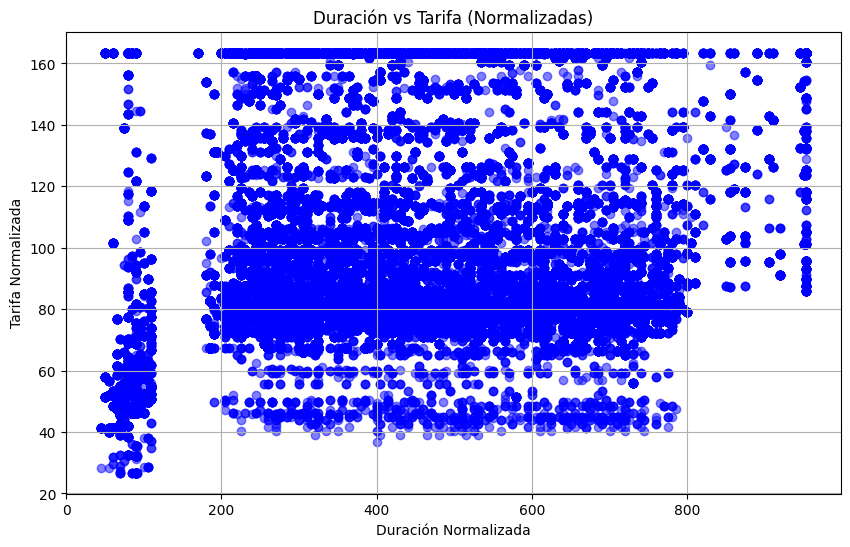

In [ ]:
import matplotlib.pyplot as plt

# Graficar el scatter plot de 'Duracion_min' vs 'Tarifa' después de la normalización
plt.figure(figsize=(10, 6))
plt.scatter(df['Duracion_min'], df['Tarifa'], alpha=0.5, color='blue')
plt.title('Duración vs Tarifa (Normalizadas)')
plt.xlabel('Duración Normalizada')
plt.ylabel('Tarifa Normalizada')
plt.grid(True)
plt.show()


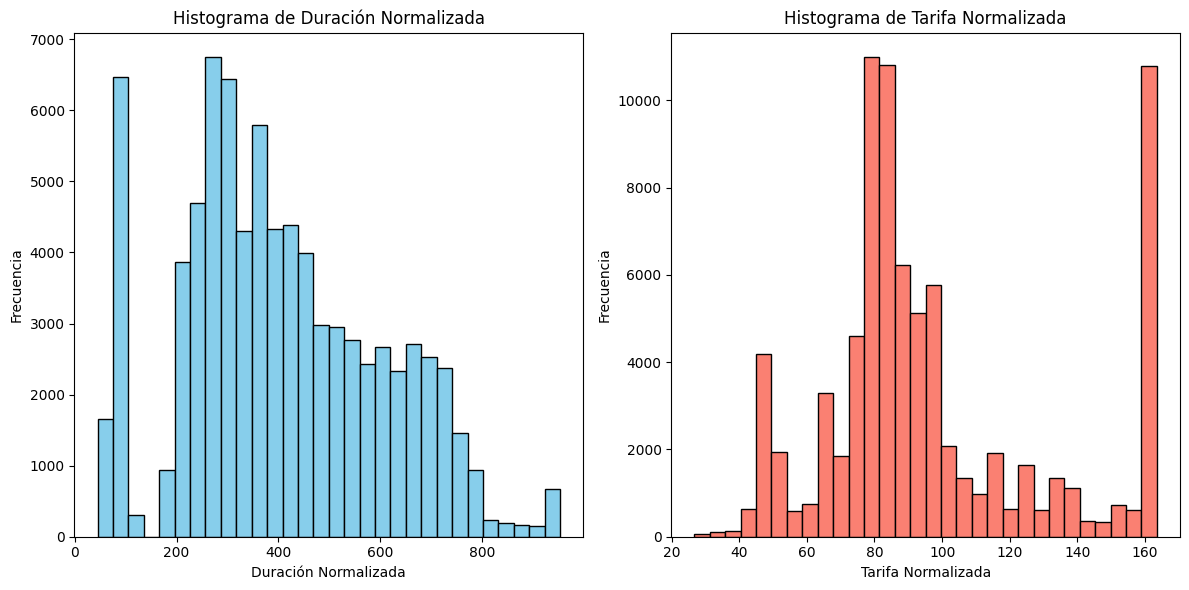

In [ ]:
# Graficar los histogramas de 'Duracion_min' y 'Tarifa' normalizadas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de Duración Normalizada
axs[0].hist(df['Duracion_min'], bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Histograma de Duración Normalizada')
axs[0].set_xlabel('Duración Normalizada')
axs[0].set_ylabel('Frecuencia')

# Histograma de Tarifa Normalizada
axs[1].hist(df['Tarifa'], bins=30, color='salmon', edgecolor='black')
axs[1].set_title('Histograma de Tarifa Normalizada')
axs[1].set_xlabel('Tarifa Normalizada')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


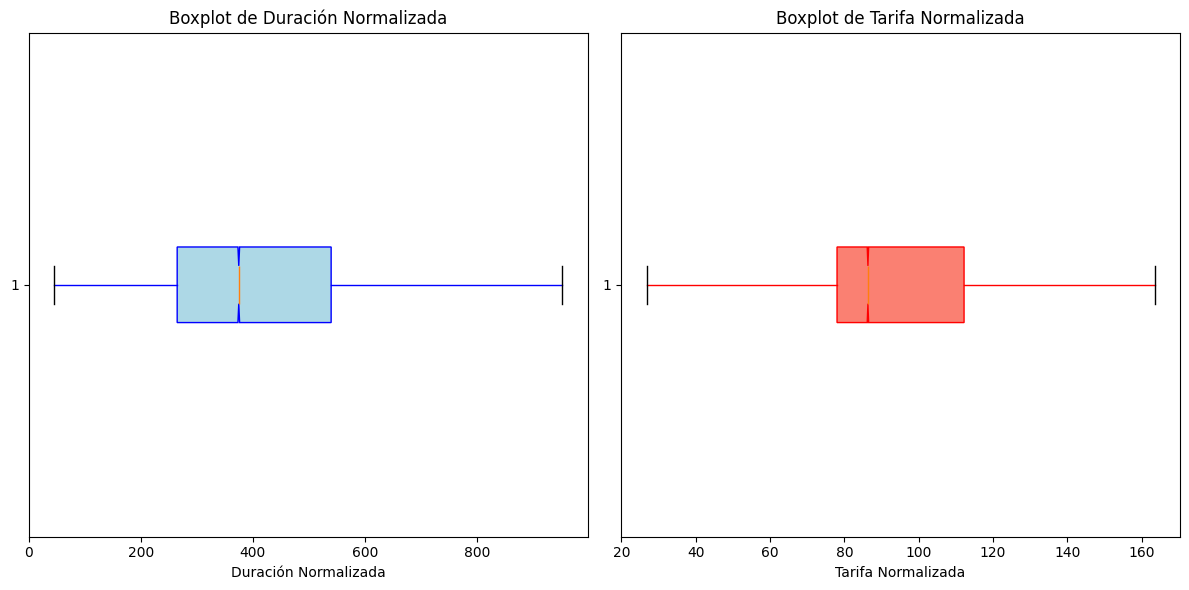

In [ ]:
# Graficar los boxplots de 'Duracion_min' y 'Tarifa' normalizadas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot de Duración Normalizada
axs[0].boxplot(df['Duracion_min'], vert=False, patch_artist=True, notch=True,
               boxprops=dict(facecolor='lightblue', color='blue'),
               whiskerprops=dict(color='blue'), flierprops=dict(markerfacecolor='red', marker='o'))
axs[0].set_title('Boxplot de Duración Normalizada')
axs[0].set_xlabel('Duración Normalizada')

# Boxplot de Tarifa Normalizada
axs[1].boxplot(df['Tarifa'], vert=False, patch_artist=True, notch=True,
               boxprops=dict(facecolor='salmon', color='red'),
               whiskerprops=dict(color='red'), flierprops=dict(markerfacecolor='orange', marker='o'))
axs[1].set_title('Boxplot de Tarifa Normalizada')
axs[1].set_xlabel('Tarifa Normalizada')

plt.tight_layout()
plt.show()


### Vizualizar

In [ ]:
df.head()

,Origen,Hora de Salida,Hora de Llegada,Destino,Tarifa,Directo,Duracion_min,Fecha de Salida Consulta,Hora de Salida Consulta
0,0,17:15:00,18:40:00,9,46.15,1,85.0,2024-10-14,11:07:26
1,0,09:40:00,11:10:00,9,46.15,1,90.0,2024-10-14,11:07:26
2,0,10:30:00,12:00:00,9,46.15,1,90.0,2024-10-14,11:07:26
3,0,10:50:00,12:20:00,9,46.15,1,90.0,2024-10-14,11:07:26
4,0,11:55:00,13:25:00,9,46.15,1,90.0,2024-10-14,11:07:26


In [ ]:
# Convertir 'Fecha de Salida Consulta' a formato datetime
df_cleaned['Fecha de Salida Consulta'] = pd.to_datetime(df_cleaned['Fecha de Salida Consulta'])

# Crear la variable "Días hasta el vuelo" tomando como referencia la fecha del vuelo (2024-03-02)
df_cleaned['Días hasta el vuelo'] = (pd.to_datetime('2025-03-02') - df_cleaned['Fecha de Salida Consulta']).dt.days

# Verificar el resultado
print(df_cleaned[['Fecha de Salida Consulta', 'Días hasta el vuelo']].head())


  Fecha de Salida Consulta  Días hasta el vuelo
0               2024-10-14                  139
1               2024-10-14                  139
2               2024-10-14                  139
3               2024-10-14                  139
4               2024-10-14                  139


In [ ]:
# Convertir las columnas 'Hora de Salida' y 'Hora de Llegada' a formato datetime.time
df_cleaned['Hora de Salida'] = pd.to_datetime(df_cleaned['Hora de Salida'], format='%H:%M:%S').dt.time
df_cleaned['Hora de Llegada'] = pd.to_datetime(df_cleaned['Hora de Llegada'], format='%H:%M:%S').dt.time

# Verificar el cambio
print(df_cleaned[['Hora de Salida', 'Hora de Llegada']].head())


  Hora de Salida Hora de Llegada
0       17:15:00        18:40:00
1       09:40:00        11:10:00
2       10:30:00        12:00:00
3       10:50:00        12:20:00
4       11:55:00        13:25:00


In [ ]:
# Convertir 'Hora de Salida' a minutos desde la medianoche
df_cleaned['Minutos desde medianoche'] = (
    df_cleaned['Hora de Salida'].apply(lambda x: x.hour * 60 + x.minute)
)

# Verificar el resultado
print(df_cleaned[['Hora de Salida', 'Minutos desde medianoche']].head())


  Hora de Salida  Minutos desde medianoche
0       17:15:00                      1035
1       09:40:00                       580
2       10:30:00                       630
3       10:50:00                       650
4       11:55:00                       715


In [ ]:
# Función para asignar rangos horarios
def categorizar_horario(hora):
    if 5 <= hora.hour < 12:
        return 'Mañana'
    elif 12 <= hora.hour < 18:
        return 'Tarde'
    elif 18 <= hora.hour < 24:
        return 'Noche'
    else:
        return 'Madrugada'

# Crear columna de rango horario
df_cleaned['Rango horario'] = df_cleaned['Hora de Salida'].apply(categorizar_horario)

# Verificar el resultado
print(df_cleaned[['Hora de Salida', 'Rango horario']].head())


  Hora de Salida Rango horario
0       17:15:00         Tarde
1       09:40:00        Mañana
2       10:30:00        Mañana
3       10:50:00        Mañana
4       11:55:00        Mañana


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instanciar el codificador
le = LabelEncoder()

# Codificar la columna 'Rango horario'
df_cleaned['Rango horario codificado'] = le.fit_transform(df_cleaned['Rango horario'])

# Verificar el resultado
print(df_cleaned[['Rango horario', 'Rango horario codificado']].head())


  Rango horario  Rango horario codificado
0         Tarde                         3
1        Mañana                         1
2        Mañana                         1
3        Mañana                         1
4        Mañana                         1


# **3. ENTRENAMIENTO DE LOS MODELOS ESCOGIDOS**

## Descripción de los Modelos Utilizados

1. **Árboles de Decisión**  
   Los Árboles de Decisión son un modelo de clasificación supervisada que utiliza una estructura de árbol para tomar decisiones basadas en una serie de reglas. Cada nodo en el árbol representa una prueba sobre una característica, y cada rama representa un resultado de esa prueba. Este modelo es fácil de entender e interpretar, pero puede ser propenso al sobreajuste si no se poda correctamente.

2. **KNN (K-Nearest Neighbors)**  
   K-Nearest Neighbors es un algoritmo de clasificación basado en la cercanía de los puntos de datos. Para clasificar un nuevo punto, el modelo considera los "K" puntos más cercanos en el espacio de características y asigna la etiqueta de clase más común entre esos vecinos. Este modelo es muy intuitivo y sencillo de implementar, pero puede ser ineficiente con grandes volúmenes de datos y sensible a las características irrelevantes.

3. **Naive Bayes**  
   Naive Bayes es un clasificador probabilístico basado en el teorema de Bayes. Asume que las características son independientes entre sí, lo cual es una suposición "naive" (ingenua). A pesar de esta suposición fuerte, es sorprendentemente efectivo en muchos problemas, especialmente en clasificación de texto y problemas con grandes cantidades de datos.

4. **LSTM (Long Short-Term Memory)**  
   Las redes neuronales LSTM son un tipo de red neuronal recurrente (RNN) diseñada para resolver el problema del desvanecimiento y explosión de gradientes en secuencias largas. Las LSTM son capaces de aprender dependencias a largo plazo en datos secuenciales, como series temporales o texto, y son ampliamente utilizadas en tareas como el procesamiento de lenguaje natural y la predicción de series temporales.

5. **Adaptive Boosting (AdaBoost)**  
   AdaBoost es un algoritmo de ensamblaje que combina múltiples clasificadores débiles (por lo general, árboles de decisión pequeños) para formar un clasificador fuerte. En cada iteración, se ajusta el peso de los ejemplos mal clasificados para que el modelo se enfoque en ellos en el siguiente ciclo. AdaBoost es muy efectivo para mejorar el rendimiento de modelos simples, pero puede ser sensible a los datos ruidosos.

6. **XGBoost**  
   XGBoost (Extreme Gradient Boosting) es una implementación optimizada de boosting de gradiente, que es un enfoque de ensamblaje basado en árboles de decisión. Es conocido por su eficiencia computacional y alto rendimiento en una amplia gama de problemas de clasificación y regresión. XGBoost es ampliamente utilizado en competencias de aprendizaje automático debido a su capacidad para manejar grandes volúmenes de datos y generar modelos de alta precisión.

7. **MLP (Multilayer Perceptron)**  
   El Perceptrón Multicapa (MLP) es una red neuronal artificial compuesta por varias capas de neuronas interconectadas. Cada neurona en una capa está conectada a todas las neuronas de la capa siguiente, lo que permite que el MLP aprenda representaciones complejas de los datos. Aunque es flexible y capaz de modelar relaciones no lineales, los MLPs pueden requerir una gran cantidad de datos y tiempo de entrenamiento.


In [ ]:
# Variables predictoras (características) y objetivo (target)
X = df[['Duracion_min', 'Directo_bin', 'Dia de la Semana de Consulta', 'Hora de la Consulta', 'Mes de Consulta', 'Hora de Salida Consulta']]  # Las características relevantes
y = df['Tarifa']  # Variable objetivo

# División de los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3.1. ENTRENAMIENTO DEL MODELO DECISSION TREE- ARBOLES DE DECISION**

In [ ]:
# Definir el umbral para clasificar los precios (por ejemplo, la mediana)
threshold = y_train.median()
y_train_class = (y_train >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)

# Entrenar el modelo de Árbol de Decisión para clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train_class)

# Predicciones
y_pred_dt = dt_model.predict(X_test)

# Evaluación
precision_dt = precision_score(y_test_class, y_pred_dt, average='macro')
accuracy_dt = accuracy_score(y_test_class, y_pred_dt)
recall_dt = recall_score(y_test_class, y_pred_dt, average='macro')
f1_dt = f1_score(y_test_class, y_pred_dt, average='macro')

print(f'Árbol de Decisión - Precisión: {precision_dt}, Exactitud: {accuracy_dt}, Recall: {recall_dt}, F1-Score: {f1_dt}')


Árbol de Decisión - Precisión: 0.6389637652034112, Exactitud: 0.6378865979381443, Recall: 0.6379852245706827, F1-Score: 0.6372825802287712


## **3.2. ENTRENAMIENTO DEL MODELO DE KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# Entrenar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train_class)

# Predicciones
y_pred_knn = knn_model.predict(X_test)

# Evaluación
precision_knn = precision_score(y_test_class, y_pred_knn, average='macro')
accuracy_knn = accuracy_score(y_test_class, y_pred_knn)
recall_knn = recall_score(y_test_class, y_pred_knn, average='macro')
f1_knn = f1_score(y_test_class, y_pred_knn, average='macro')

print(f'KNN - Precisión: {precision_knn}, Exactitud: {accuracy_knn}, Recall: {recall_knn}, F1-Score: {f1_knn}')


KNN - Precisión: 0.6444587199992282, Exactitud: 0.6443912616593029, Recall: 0.6443617106989274, F1-Score: 0.6443197920139396


## **3.3. ENTRENAMIENTO DEL MODELO DE NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Entrenar el modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_class)

# Predicciones
y_pred_nb = nb_model.predict(X_test)

# Evaluación
precision_nb = precision_score(y_test_class, y_pred_nb, average='macro')
accuracy_nb = accuracy_score(y_test_class, y_pred_nb)
recall_nb = recall_score(y_test_class, y_pred_nb, average='macro')
f1_nb = f1_score(y_test_class, y_pred_nb, average='macro')

print(f'Naive Bayes - Precisión: {precision_nb}, Exactitud: {accuracy_nb}, Recall: {recall_nb}, F1-Score: {f1_nb}')


Naive Bayes - Precisión: 0.7475445070763618, Exactitud: 0.5942562592047128, Recall: 0.5933365289169109, F1-Score: 0.5188848922308859


## **3.4. ENTRENAMIENTO DEL MODELO DE ADABOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Entrenar el modelo AdaBoost
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train_class)

# Predicciones
y_pred_ada = ada_model.predict(X_test)

# Evaluación
precision_ada = precision_score(y_test_class, y_pred_ada, average='macro')
accuracy_ada = accuracy_score(y_test_class, y_pred_ada)
recall_ada = recall_score(y_test_class, y_pred_ada, average='macro')
f1_ada = f1_score(y_test_class, y_pred_ada, average='macro')

print(f'AdaBoost - Precisión: {precision_ada}, Exactitud: {accuracy_ada}, Recall: {recall_ada}, F1-Score: {f1_ada}')


AdaBoost - Precisión: 0.6402822383796101, Exactitud: 0.6323637702503682, Recall: 0.6320825931879062, F1-Score: 0.626804160242584


## **3.5. ENTRENAMIENTO DEL MODELO DE XGBOOST**

In [ ]:
from xgboost import XGBClassifier

# Entrenar el modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train_class)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluación
precision_xgb = precision_score(y_test_class, y_pred_xgb, average='macro')
accuracy_xgb = accuracy_score(y_test_class, y_pred_xgb)
recall_xgb = recall_score(y_test_class, y_pred_xgb, average='macro')
f1_xgb = f1_score(y_test_class, y_pred_xgb, average='macro')

print(f'XGBoost - Precisión: {precision_xgb}, Exactitud: {accuracy_xgb}, Recall: {recall_xgb}, F1-Score: {f1_xgb}')


XGBoost - Precisión: 0.6912277872784032, Exactitud: 0.689494354442808, Recall: 0.6893807658835669, F1-Score: 0.6887061548489377


## **3.6. ENTRENAMIENTO CON MLP- MULTILAYER PERCEPTRON**

In [ ]:
from sklearn.neural_network import MLPClassifier

# Entrenar el modelo MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train_class)

# Predicciones
y_pred_mlp = mlp_model.predict(X_test)

# Evaluación
precision_mlp = precision_score(y_test_class, y_pred_mlp, average='macro')
accuracy_mlp = accuracy_score(y_test_class, y_pred_mlp)
recall_mlp = recall_score(y_test_class, y_pred_mlp, average='macro')
f1_mlp = f1_score(y_test_class, y_pred_mlp, average='macro')

print(f'MLP - Precisión: {precision_mlp}, Exactitud: {accuracy_mlp}, Recall: {recall_mlp}, F1-Score: {f1_mlp}')


MLP - Precisión: 0.5466490637275143, Exactitud: 0.5349779086892489, Recall: 0.5355469008123764, F1-Score: 0.5058571240617811


## **3.7. ENTRENAMIENTO CON LSTM- LONG SHORT TERM MEMORY**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Reestructurar los datos para LSTM (expandir dimensiones)
X_train_lstm = np.expand_dims(X_train, axis=1)
X_test_lstm = np.expand_dims(X_test, axis=1)

# Convertir la variable de salida en categorías
y_train_cat = to_categorical(y_train_class)
y_test_cat = to_categorical(y_test_class)

# Definir el modelo LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(2, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo LSTM
lstm_model.fit(X_train_lstm, y_train_cat, epochs=10, batch_size=32, verbose=1)

# Evaluar en el conjunto de prueba
loss, accuracy_lstm = lstm_model.evaluate(X_test_lstm, y_test_cat)
print(f'LSTM - Precisión: {accuracy_lstm}')


Epoch 1/10
2037/2037 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.5919 - loss: 0.6442
Epoch 2/10
2037/2037 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5938 - loss: 0.6405
Epoch 3/10
2037/2037 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5916 - loss: 0.6382
Epoch 4/10
2037/2037 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5975 - loss: 0.6380
Epoch 5/10
2037/2037 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5921 - loss: 0.6399
Epoch 6/10
2037/2037 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5951 - loss: 0.6394
Epoch 7/10
2037/2037 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5979 - loss: 0.6391
Epoch 8/10
2037/2037 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5933 - loss: 0.6389
Epoch 9/10
2037/2037 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5994 - loss: 0.6379
Epoch 10/10
2037/2037 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5941 - loss: 0.6403
510/510 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5998 - loss: 0.6373
LSTM - Precisión: 0.6020495891571045


## **3.7. PREDICCIONES**

In [ ]:
# Predicciones del Árbol de Decisión para la tarea de Regresión
y_pred_tree_reg = tree_reg_model.predict(X_test_scaled)

# Mostrar algunas predicciones
print("Árbol de Decisión - Predicciones (Regresión)")
print(y_pred_tree_reg[:10])  # Mostrar las primeras 10 predicciones


Árbol de Decisión - Predicciones (Regresión)
[[142.    46.15]
 [139.    52.05]
 [122.    82.73]
 [135.    80.44]
 [139.    87.45]
 [135.    81.55]
 [135.    78.08]
 [139.    46.15]
 [139.    93.35]
 [135.    79.19]]


In [ ]:
# Predicciones de KNN para la tarea de Regresión
y_pred_knn_reg = knn_reg_model.predict(X_test_scaled)

# Mostrar algunas predicciones
print("KNN - Predicciones (Regresión)")
print(y_pred_knn_reg[:10])  # Mostrar las primeras 10 predicciones


KNN - Predicciones (Regresión)
[[142.     46.15 ]
 [139.     52.05 ]
 [122.     82.494]
 [135.4    80.44 ]
 [139.     87.45 ]
 [135.4    81.55 ]
 [135.     78.08 ]
 [139.     46.15 ]
 [139.     93.35 ]
 [135.2    77.766]]


In [ ]:
# Predicciones de Naive Bayes para la tarea de Clasificación
y_pred_nb_class = nb_model.predict(X_test_scaled)

# Mostrar algunas predicciones
print("Naive Bayes - Predicciones (Clasificación)")
print(y_pred_nb_class[:10])  # Mostrar las primeras 10 predicciones


Naive Bayes - Predicciones (Clasificación)
[1 1 3 1 3 2 2 1 1 2]


In [ ]:
# Predicciones de AdaBoost para la tarea de Clasificación
y_pred_ada_class = ada_boost_model.predict(X_test_scaled)

# Mostrar algunas predicciones
print("AdaBoost - Predicciones (Clasificación)")
print(y_pred_ada_class[:10])  # Mostrar las primeras 10 predicciones


AdaBoost - Predicciones (Clasificación)
[1 1 1 1 1 2 2 1 1 2]


In [ ]:
# Predicciones de XGBoost para la tarea de Clasificación
y_pred_xgb_class = xgb_model.predict(X_test_scaled)

# Mostrar algunas predicciones
print("XGBoost - Predicciones (Clasificación)")
print(y_pred_xgb_class[:10])  # Mostrar las primeras 10 predicciones


XGBoost - Predicciones (Clasificación)
[1 1 3 3 3 2 2 1 1 2]


In [ ]:
# Predicciones de MLP para la tarea de Clasificación
y_pred_mlp_class = mlp_model.predict(X_test_scaled)

# Mostrar algunas predicciones
print("MLP - Predicciones (Clasificación)")
print(y_pred_mlp_class[:10])  # Mostrar las primeras 10 predicciones


MLP - Predicciones (Clasificación)
[1 1 3 3 3 2 2 1 1 2]


In [ ]:
# Predicciones de LSTM para la tarea de Clasificación
y_pred_lstm_class = lstm_model.predict(X_test_lstm)

# Umbral de predicción (0.5) para convertir en etiquetas binarias
y_pred_lstm_class = (y_pred_lstm_class > 0.5).astype(int)

# Mostrar algunas predicciones
print("LSTM - Predicciones (Clasificación)")
print(y_pred_lstm_class[:10])  # Mostrar las primeras 10 predicciones


164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM - Predicciones (Clasificación)
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


# **4. COMPARACION DE RESULTADOS**

                              Precisión  Exactitud    Recall  F1-Score  \
XGBoost                        0.691228   0.689494  0.689381  0.688706   
K-Vecinos Más Cercanos (KNN)   0.644459   0.644391  0.644362  0.644320   
AdaBoost                       0.640282   0.632364  0.632083  0.626804   
Árbol de Decisión              0.638964   0.637887  0.637985  0.637283   
MLP                            0.546649   0.534978  0.535547  0.505857   
Naive Bayes                    0.747545   0.594256  0.593337  0.518885   

                                   AUC  
XGBoost                       0.776531  
K-Vecinos Más Cercanos (KNN)  0.718431  
AdaBoost                      0.691073  
Árbol de Decisión             0.684194  
MLP                           0.618093  
Naive Bayes                   0.587188  


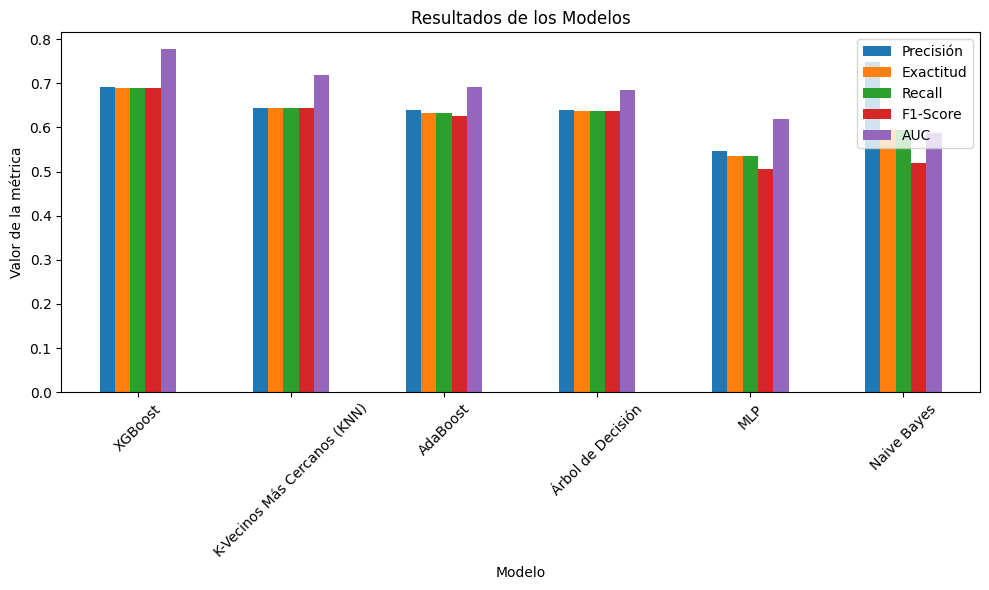

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc, precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Diccionario para almacenar los resultados de cada modelo
resultados = {}

# Definir una función para evaluar y almacenar las métricas
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo):
    # Predecir las clases y probabilidades
    y_pred = modelo.predict(X_test)
    if hasattr(modelo, "predict_proba"):
        y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva
    else:
        y_prob = y_pred  # Para modelos que no tienen `predict_proba`, usamos las predicciones

    # Calcular las métricas
    precision = precision_score(y_test_class, y_pred, average='macro')
    accuracy = accuracy_score(y_test_class, y_pred)
    recall = recall_score(y_test_class, y_pred, average='macro')
    f1 = f1_score(y_test_class, y_pred, average='macro')
    auc_score = roc_auc_score(y_test_class, y_prob)

    # Guardar los resultados
    resultados[nombre_modelo] = {
        "Precisión": precision,
        "Exactitud": accuracy,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc_score
    }

# Aplicar la función a cada modelo
evaluar_modelo(dt_model, X_test, y_test_class, "Árbol de Decisión")
evaluar_modelo(knn_model, X_test, y_test_class, "K-Vecinos Más Cercanos (KNN)")
evaluar_modelo(ada_model, X_test, y_test_class, "AdaBoost")
evaluar_modelo(xgb_model, X_test, y_test_class, "XGBoost")
evaluar_modelo(nb_model, X_test, y_test_class, "Naive Bayes")
evaluar_modelo(mlp_model, X_test, y_test_class, "MLP")

# Convertir los resultados en un DataFrame de pandas
resultados_df = pd.DataFrame(resultados).T  # La T es para transponer y que los modelos sean las filas
resultados_df = resultados_df.sort_values(by="AUC", ascending=False)  # Ordenar por AUC (opcional)

# Mostrar la tabla de resultados
print(resultados_df)

# Si deseas graficar los resultados en forma de barras (opcional):
resultados_df[['Precisión', 'Exactitud', 'Recall', 'F1-Score', 'AUC']].plot(kind='bar', figsize=(10, 6))
plt.title("Resultados de los Modelos")
plt.ylabel("Valor de la métrica")
plt.xlabel("Modelo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


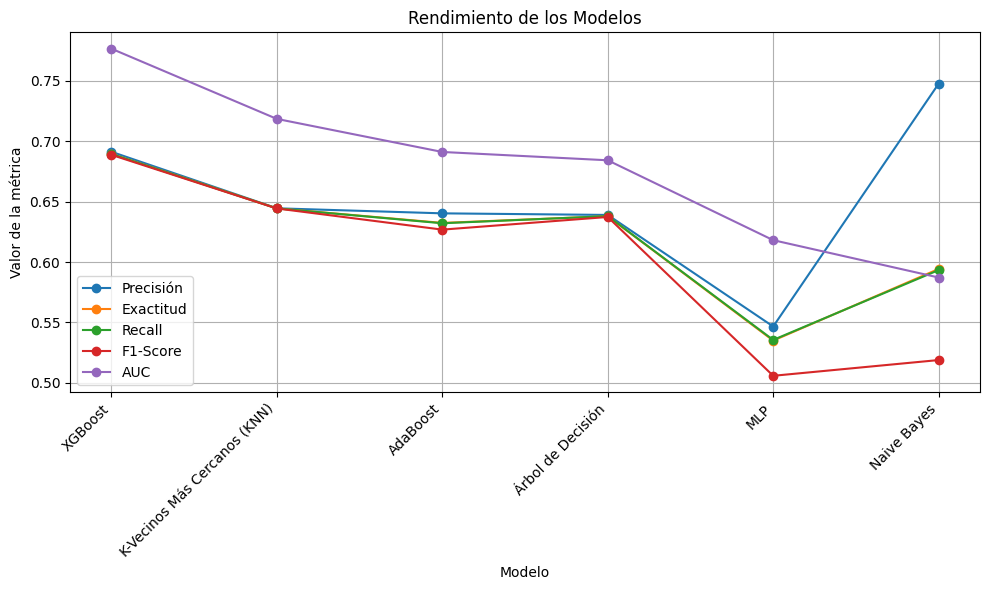

In [ ]:
import matplotlib.pyplot as plt


# Create the line plot
plt.figure(figsize=(10, 6))
for metric in ['Precisión', 'Exactitud', 'Recall', 'F1-Score', 'AUC']:
    plt.plot(resultados_df.index, resultados_df[metric], label=metric, marker='o')

plt.title('Rendimiento de los Modelos')
plt.xlabel('Modelo')
plt.ylabel('Valor de la métrica')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()